# Computational Intelligence in Manufacturing Systems
# MFAIMFG
#### Prepared by: Joseph Aristotle de Leon
#### Checked by: SME Academics Database team
#### Initial Publish: January 5, 2021
#### Assignment Code from the class of: Dr. Robert Kerwin Billones


# Machine Learning Exercise 1 - Linear Regression

## INTRODUCTION

The idea of linear regression is that a best fit line is created that best represents the set of existing data. This line (also known as a model) can be used to predict/estimate the expected/target values when a given set of features/inputs is given.  


In this activity, we would be dealing with two sets of data. The first dataset contains the population of several cities and its corresponding profit when a food truck business is installed in that respecitive area (Linear Regression with one variable). The second deals with predicting the price of a house given info about its size in square feet and the number of bedrooms (Linear regression with multiple variables). 

Also, we will be implementing the long method of performing linear regression by creating the necessary functions and variables, as well as we will be using the sklearn library to see how easy it is to do this machine learning task. 

## CODE DESIGN

### Linear regression with one variable

To start, the codeblock below imports the necessary libraries to assist us in implementing linear regression in python.

Numpy (or Numerical Python) is responsible for handling mathmatical operations of matrices which include addition, multiplication, transposition and other matrix manipulations. It is worth noting that the data we are working on is represented as a matrix, where the columns represent the features and its corresponding output value, while the rows contain the sample/instance points.

Pandas is imported so that data from an external file (in this case we use csv data) can be accessed and manipulated within the python program. It is mainly used for data analysis (descriptive statistics).

Matplotlib is used to visualize data. In the context of this activity, matplotlib creates a scatter plot to map the input(X) and output(y) values of each sample point. Additionally, we could also embed a line to the scatter plot to show regression line that best fits/generalizes the data points. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In order to start the linear regression activity, we need to copy the data that we intend to work on into the python program. This is where the role of pandas comes in. 

We need first to specify the file (and its file path) that we would access. The os library is also imported in order to determine the current working path (through the .getcwd() method), which can be appended to the file name of the data. 

Then we use pandas method .read_csv() to copy the data from the text file to the variable named data. Doing this makes the datatype of the variable data into a dataframe. The arguments needed by this pandas method are the path location and ,as an option, the column names which are in a list. 

To verify that the data from the file is transferred to the program, we call data.head() to show the values of the top 5 samples. The format of presenting the data is almost similar to that of Excel. 

Note: 
Even though that we see only four samples in the output, keep in mind that using pandas, in this context, does not change the values in the text file (the values are unchanged). Through out the program, we are not directly accessing the text file to obtain the data, rather, we are using the variable data to access and manipulate the values.

In [2]:
import os
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Pandas is used by for data analysis. When working with data, we cannot do away with descriptive statistics. Popularly, we do this in Microsoft Excel where we compute for the average, standard deviation, mode, etc. We can also do the same thing in pyhton through pandas. It has the .describe() method in order to perform all available descriptive measures all at once for each feature/column.

If only one descriptive measure is needed to be accessed say the mean population, we could do so by calling data['Population'].mean(0).
We could do with the other measures by changing the ethod name, and column name.


In [3]:
data.describe()
#data["Population"].mean(0)

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Before starting with our linear regression task, it is good practice to observe first if the data resembles a linear relationship. We use matplotlib's method .plot() to create a scatter plot of the data. It takes in the arguments: 

* 'kind' which is the type of chart to show, which in this case a scatter plot

* 'x' the name of the column that represents the x axis/features (Population)

* 'y' the name of the column that represents the y axis/output (Profit)

* 'figsize' the size of the plot

As we can see, the data resembles a linear relationship. However, this knowledge alone is not enough for this activity. What we need to do is to find the equation of the line that would best represent the data points.  

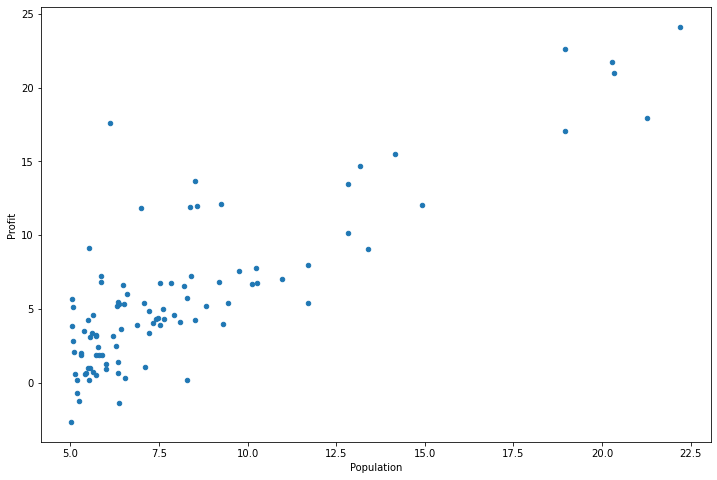

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

As we said in the previous block, our goal is to find the best fit line of the given data. By definition, the best fit line is the best approximation of the given set of data. This means that it minimizes the overall difference/error between the output values of sample points and the computed value of the best fit line for a given value of a feature(s). This is useful because we could predict an output value for a specific feature value if it is not present in the available data. 

Since we are talking about linear regression, what we are doing is to find the best parameters of the line equation y=mx+b. The parameters are the slope (m) and the y intercept (b). Reiterating what is said above, we need to find the best values of m and b that would minimize the difference of the computed y in the equation to the actual output value of a certain sample point given its feature value (x).

Mathematically, we minimize the difference/error through a cost function. What we want is to have the said parameters output the value of the cost function that is low as possible. The most common cost function used in a linear regression problem is the Mean Squared Error (MSE) shown below:

<img src="files/cost function.PNG" width="240" height="240" align="center"/>

where:
* m is the total number of sample points

* i represents a single sample point

* y(i) is the 'output value' of a specified sample point (also known as the target value that the regression line must achieve for that point)

* h(x(i)) is the 'computed value' of the line equation y=mx+b for a specified sample point

###### Take note that this cost function considers all sample points (not just one) since each difference is being summed.

To implement this cost function in python, we first define it with the function name computeCost. It takes in three arguments:

* X= a m by n+1 matrix (n is the number of features) that contains the values of the features (the last feature is extraneous. Its there to satify a matrix multipication rule)

* y= a m by 1 matrix/vector that contains the target values of each sample point

* theta= a 1 by 2 matrix/vector that contains the parameters slope(m) and y-intercept(b)

Inside the function, it first computes the squared difference between the target value to the computed value (X * theta.T is the matrix operation equivalent to y=mx+b) for all sample points

The difference matrix is then summed and divided by 2m to output the cost of the function.

<img src="files/cost function_parts.PNG" width="240" height="240" align="center"/>


This where Numpy becomes really handy. Traditionally, we need to use looping functions to calculate the 'inner' equation for each sample point. This is computationally heavy and messy to code with. But through Numpy's feature of handling matrix operations, we can simplify the process by doing it all at once since the sample points are represented as a matrix. 


In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Going back to why the matrix X in the cost function has an additional column, it is necessary because it needs to assure that X * theta.T would always abide with the rules of matrix multiplication that is "the number of columns in the first matrix (X) must be equal to the number of rows in the second matrix (theta.T)". If we multiply without defining an additional column to X, the rule is not satisfied because there is one feature (column) in X while two parameters in theta (row). 

Knowing that this equation is actually a representation of y=mx+b for each sample point, we can see that we have to add an additional feature that contains a value of all ones (1) so that b can be obtained 'legally'. An alternative manifestation to the matrix multiplication rule, it will assure that all terms are a product between two values each from the two matrices. Simply, the computed value is now represented as y=mx+b(1). 

This is why we inserted a new column to the data variable that contains the value 1 all through out. 

In [6]:
data.insert(0, 'Ones', 1)

We now need to select the values in the data variable which would serve as our feature matrix (X) and target output matrix (y). Since features are the ones to be multiplied to the parameters of the line, we select all values under the Ones and Population column. While the values under the Profit column are the our targets. 

The following code below slices and saves the needed values for each matrix. 

In [7]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

We can check if we select the right values for the X matrix variable through the .head() method.

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


Same thing can be done for the y matrix variable

In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Technically, X and y are still a dataframe datatype. What is needed by our cost function are variables that are in the datatype 'matrix'. To do this, we convert the dataframe variables to matrix variables through the Numpy method .matrix().

Likewise, we also initialize the value of the parameters to m=0 and b=0 using the same numpy method. 

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

We show the initial values of theta (the variable that contains the parameters b and m [in that order])

In [11]:
theta

matrix([[0, 0]])

We also check the size of each matrices so that the rules of matrix operations (addition and multiplication) are followed.

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Let us check first the cost value when we set both m and b to be 0. we call the computeCost() function and inserted the said matrices as arguments. The output cost, using these parameters, is 32.07. 

In [13]:
computeCost(X, y, theta)

32.072733877455676

What we want is to have a cost value that is very low (or converges at the global minima of the cost function). To do this, we use the process of gradient descent, a mechanism for telling the next values of the parameters that would minimize the cost function. This function is runned many times (called iterations). The equation for gradient descent is based on the derivative of the cost function with respect to one of the parameters. The equation, for each parameter, is defned below:
<img src="files/gradient descent.PNG" width="400" height="400" align="center"/>

where
* theta0=the y intercept (b)
* theta1=the slope (m)
* alpha= learning rate

Notice that the terms at the right most portion of each equations which are used to subtract the value of parameters are the one responsible for updating/changing the new values of the said parameter.

###### As a bonus, you could try to derive the gradient descent function by applying differentiation techniques (just note the concept of chain rule when performing the process)

In ths program, we translate the equation into the function gradientDescent() which takes in the arguments:
* X= the feature matrix of the sample points
* y= the target output matrix/vector of the sample points
* alpha= learning rate
* iter= number of iterations to perform gradient descent

Inside the function, it first initializes the variables 'temp', which holds the values of the parameters that changes every iteration, 'parameters', which holds the integer value of the number of parameters (in this case 2), and 'cost', which is a numpy array that saves the cost values of at each iteration (useful to show how each the cost value changes over many iterations). 

We then perform gradient descent for each iteration (where all computation happen under the first level for loop). The 'error' variable calculates the difference between the computed value and the target value. Then for each parameter, we multiply it with the feature (notice that it is based on the pairing of the terms on the line equation y=mx + b(1)). Then temp for each parameter is calculated by taking into account the entire gradient descent equation. In a particular iteration, we save the temp value to theta (which changes every iteration) and save the cost value of that iteration to the cost array (we use the computeCost function that we constructed above).

<img src="files/gradient descent_parts.PNG" width="400" height="400" align="center"/>

In the end, the function would return the optimized values of theta and the history of all cost values at each iteration.

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In every machine learning models like linear regression, there are hyperparameters that defines how the learning process behaves. Unlike parameters, these hyperparameters are constant all through out the machine learning process. In linear regression, the hyper parameters are
* the learning rate denoted by the variable 'alpha'. This dictates the magnitude of change of the parameter values. Going back to gradient descent equations, these serve as the scaling factors to the terms that are used to subtract/change the parameter values. Take note that it is a misconception that the learning rate dictates how fast the algorithm finds the best parameters, meaning a bigger learning rate means a lesser needed iterations to perform. It is not.   
* iterations denoted by the variable 'iters'. It tells how many iterations of gradient descent to perform. A very high number of iterations might be pointless if the minima of the cost function is already obtained at lower number of iterations. Similarly, having it too low might not achieve the minima cost value.

It is better to try different values of the hyperparameters that would best find the minima cost value with lesser computaional resources (iterations) 

In [15]:
alpha = 0.01
iters = 1000

With all the nesseary functions and variables needed to perform linear regression, we now call the gradientDescent() function to find the best fit line. The variable 'g' saves the values of the parameters that minimizes the cost function. As we can see, it output the matrix [-3.24140214,  1.1272942 ] or we can say that the best fit line is y=(1.1272942)x-3.24140214. This equation can now be used to predict the profit value for values of the population variable that are not available in the dataset.  

In [16]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

To know the cost value of this parameter, we can call the computeCost function and have g, with the best parameter, be the value to the theta argument. We can see that its cost is 4.516. Much lower than the ones we initially started out (32.07) 

In [17]:
computeCost(X, y, g)

4.515955503078912

We can visualize the line with respect to the scatter plot through the code below.  Take thatat the second line, it is the equation y=(1.1272942)x-3.24140214.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

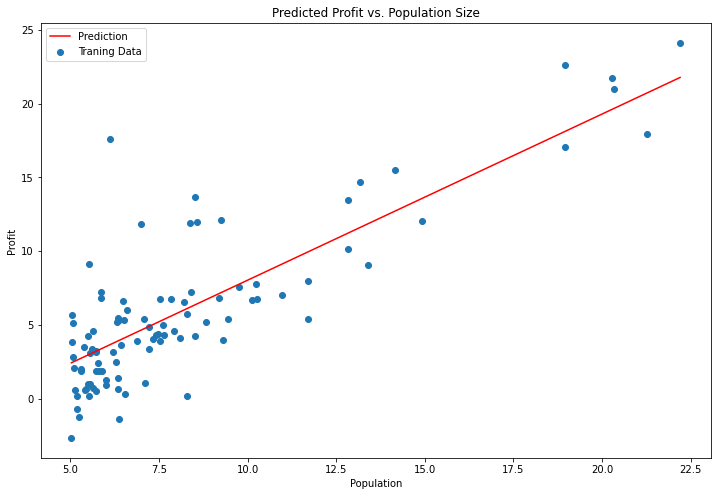

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

We can also show how the cost function is being minimized through the code below.  

Text(0.5, 1.0, 'Error vs. Training Epoch')

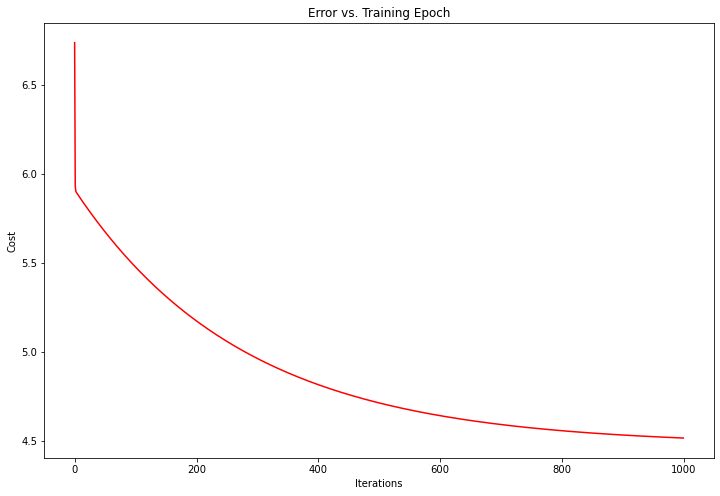

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Linear regression with multiple variables

Now, we would be dealing with a linear regression problem that involves mulitple varibales/features. To start we would need to copy the data from the second data file (in text format) to the program. The code is similar to what we did in the precious task, but we need to specify the new file location of the data we would be working on. 

To verify that we copied the correct data, we call the .head() method. 

In [31]:
path = os.getcwd() + '\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


As we can see from the first five sample points, the features size and bedrooms, as well as the target values price, are of different magnitudes. The feature bedroom is very small that ranges within the ones digit only, while the size feature are in the thousands place. In the context of machine learning, having values of features that differ greatly to one another makes gradient descent difficult. One intuition is that features that are very large in value would make its corresponding parameter very small which, because of its small resolution, would be difficult to achieve the most optimum value for it [parameter].  

In order to solve the issue, we make the values of all features and even its target output to be at the same range of values. To achieve this, we compute the Z score of each sample point for its corresponding parameter. Formula is shown below:

<img src="files/Z score.PNG" width="400" height="400" align="center"/>

The Z scores of the values is what we are using for training. If we are to deploy the trained model, we will convert the computed output (which is in its Z score) to its actual numerical value.

In [32]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Just like what we did in the regression probem for one variable, we add an extraneous feature of all ones for the rules of matrix operations to be satisfied. 

In [33]:
data2.insert(0, 'Ones', 1)

We save the values of both the features and target values to the variables X2 and y2 respectively.

In [34]:
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

We convert both variables from a dataframe to a numpy matrix. We also initialize the values of the parameters to be all zeros. 

In [35]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
X2

matrix([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
        [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
        [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
        [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
        [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
        [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
        [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
        [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
        [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
        [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
        [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
        [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
        [ 1.00000000e+00

Because we have already made the necessary functions for computing the cost function and performing gradient descent, we call the function gradientDescent() to achieve the set set of the best parameters for the linear regression problem. 

###### One good thing with the computeCost() and gradientDescent() functions that was made is that they are scalable to work with larger numbers of features. 

In [25]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

To know the value of the cost function for the best set of paramters that we obtained, we call the computeCost() function with g2 as the parameter argument. We obtain a cost of 0.131

In [26]:
computeCost(X2, y2, g2)
g2

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

We sketch the plot of the cost values over each iteration to see how the learning process occured. As we can see, the cost started to plataue aroud the 600th iteration. This means that we have reached convergence with the global minima (very lowest value) of the cost at that instant. 

Text(0.5, 1.0, 'Error vs. Training Epoch')

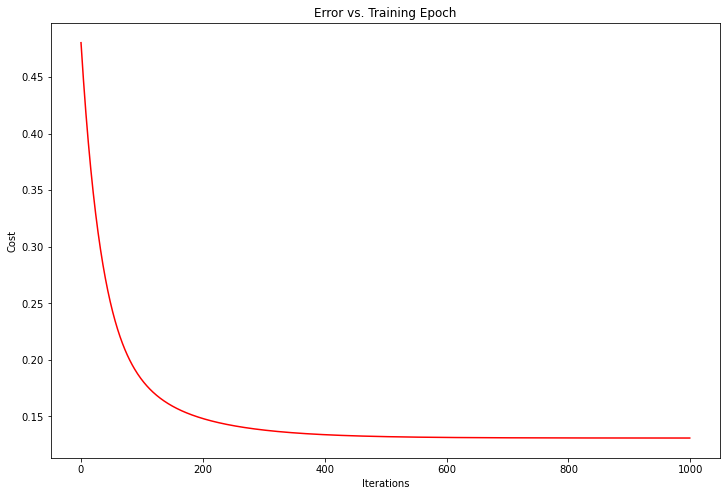

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Alternatively, we can perform linear regression easily using the sklearn library. What the library does is that it allows users to perform many machine learning methods using a few lines of code. Rather than coding all the necessary functions for linear regression, we just need to prepare the variables that contains the sample data, and run the .fit() method to perform learning.

In the code, we import first the the linear_model library, a sub library of sklearn. Then we instantiate (initially create) the model and save it as variable model. Afterwards, we perform gradient descent by calling the .fit() method with the arguments X and y, which contains the features and target values.

In [28]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

model.score(X,y)

print(model.coef_)
print(model.intercept_)

[[0.         1.19303364]]
[-3.89578088]


Now that the learning process is done, we can visualize the best fit line for the sample data. 

Inside the code, we first get the feature values of the data. Then we use the .predict() method to compute for the value of the profit based on the best set of parameters that was trained. The rest of the code is similar to that was done above to visualze the data.

* To obtain the set of paramters, call model.coef_ and model.intercept_. Additionally, to know the cost value, call .score (X,y)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

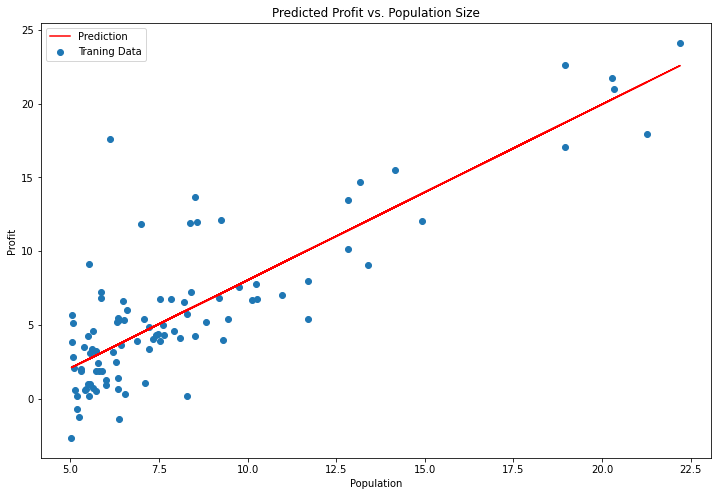

In [29]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

## ANALYSIS OF RESULTS

For the first linear regression problem, we see that between the two methods (through long cut method vs the sklearn method), the latter offers a lower loss. This could mean that the gradient descent for the first method did not yet converge to the global minima of the cost function.

In summary, the best fit line for each problems are:

(1) y= (1.19303364)x -3.89578088

(2) y=-1.10868761e-16 +  (8.78503652e-01)x1 - (4.69166570e-02)x2

## CONCLUSION

Linear regression is a good tool in generalizing the data if it resembles a linear relationship. The model/equation that we obtain from the training process can be used to predict/estimate the target value for features that are not considered in the dataset. In its implentation in python, it is a good practice to learn the long cut method of implementing linear regression so that we understand the operations that are needed to perform. However, for convenience, it is recommended to use the sklearn library instead. 